In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import torch

In [3]:
def summary_test(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["test_loss"])
    tmp2 = np.array(history[0]["test_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["test_loss"])
        tmp2 += np.array(history[j]["test_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_val(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["val_loss"])
    tmp2 = np.array(history[0]["val_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["val_loss"])
        tmp2 += np.array(history[j]["val_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_train(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["train_loss"])
    tmp2 = np.array(history[0]["train_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["train_loss"])
        tmp2 += np.array(history[j]["train_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

In [4]:
def search_best_lr(path, n_nodes, lr_list):
    
    best_acc = -1
    best_lr = -1
    
    for lr in lr_list:
        _, acc = summary_val(f"{path}/lr_{lr}_beta_0.9", n_nodes)
            
        #print(method, lr, acc[-1])
        if best_acc < acc[-1]:
            best_acc = acc[-1]
            best_lr = lr
    return best_lr

def average_acc(acc_list):
    avg = []
    std = []
    for i in range(len(acc_list[0])):
        avg.append(np.average([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        std.append(np.std([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        
    return avg, std

In [5]:
!ls ../results/cifar100_vgg/node_5/0/alpha_1.0/* #one_peer_deco2 #one_peer_deco/ #0/alpha_10.0/ring/

../results/cifar100_vgg/node_5/0/alpha_1.0/one_peer_deco3:
lr_0.05_beta_0.9  lr_0.1_beta_0.9

../results/cifar100_vgg/node_5/0/alpha_1.0/one_peer_exp:
lr_0.05_beta_0.9  lr_0.1_beta_0.9

../results/cifar100_vgg/node_5/0/alpha_1.0/ring:
lr_0.05_beta_0.9  lr_0.1_beta_0.9


# cifar100

ring 0.05 59.77 0.0
one_peer_deco3 0.05 61.195714285714295 0.0
one_peer_exp 0.05 61.508571428571436 0.0


Text(0.5, 1.0, 'n=7, alpha=10.0')

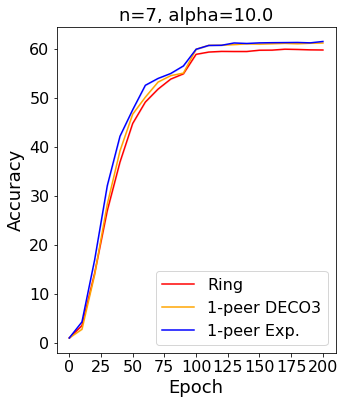

In [6]:
alpha = 10.0
n_nodes = 7

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.05 52.09857142857144 0.0
one_peer_deco3 0.05 59.845714285714294 0.0
one_peer_exp 0.05 59.317142857142855 0.0


Text(0.5, 1.0, 'n=7, alpha=1.0')

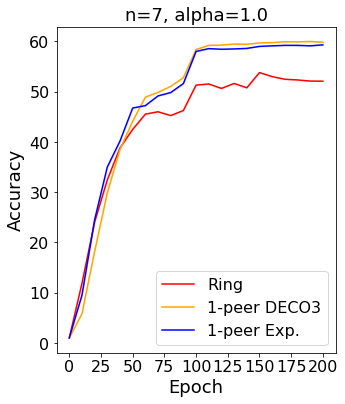

In [7]:
alpha = 1.0
n_nodes = 7

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.05 38.96857142857142 0.0
one_peer_deco3 0.05 53.23714285714285 0.0
one_peer_exp 0.1 43.14999999999999 0.0


Text(0.5, 1.0, 'n=7, alpha=0.1')

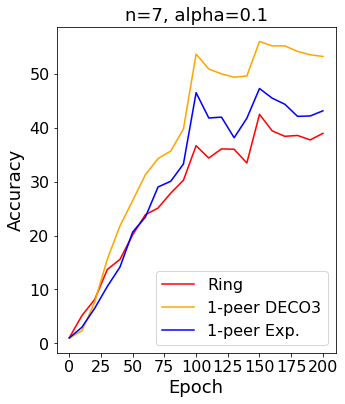

In [8]:
alpha = 0.1
n_nodes = 7

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.05 61.156 0.0
one_peer_deco3 0.05 63.068000000000005 0.0
one_peer_exp 0.05 62.885999999999996 0.0


Text(0.5, 1.0, 'n=5, alpha=10.0')

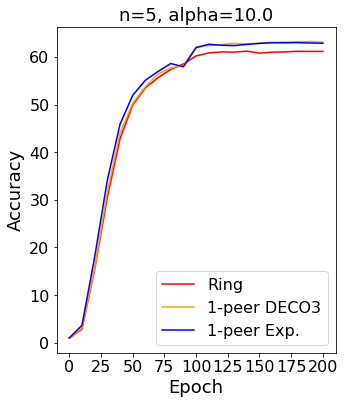

In [9]:
alpha = 10.0
n_nodes = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.05 55.90200000000001 0.0
one_peer_deco3 0.05 61.42200000000001 0.0
one_peer_exp 0.05 61.99800000000001 0.0


Text(0.5, 1.0, 'n=5, alpha=1.0')

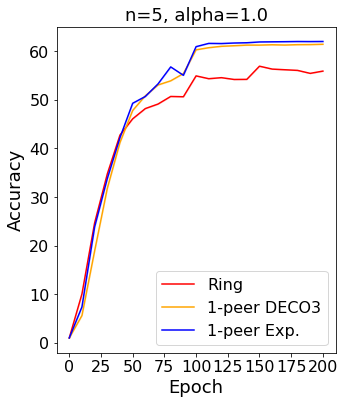

In [10]:
alpha = 1.0
n_nodes = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring 0.1 41.966 0.0
one_peer_deco3 0.05 58.506 0.0
one_peer_exp 0.1 44.908 0.0


Text(0.5, 1.0, 'n=5, alpha=0.1')

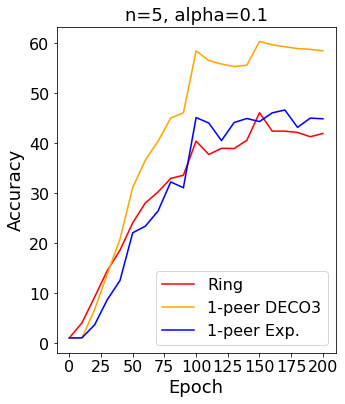

In [11]:
alpha = 0.1
n_nodes = 5

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_deco3", "one_peer_exp"]
labels = ["Ring", "1-peer DECO3", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,]:
        lr = search_best_lr(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.05])
        loss, acc = summary_test(f"../results/cifar100_vgg/node_{n_nodes}/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
